In [2]:
from numpy import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import time
import torch as torch
torch.set_printoptions(precision=8)
torch.set_default_dtype(torch.double)
torch.set_default_tensor_type(torch.DoubleTensor)

<font size="3"> $$f(x)=(-1)*x^3+\theta x$$
\begin{align}
\label{Eq:General MVSDE}
d X_{t} &= \Big( v(X_{t},\mu_{t}^{X}) + b(t,X_{t}, \mu_{t}^{X})\Big)d t + \sigma(t,X_{t}, \mu_{t}^{X})d W_{t},  \quad X_{0} \in L_{0}^{m}( R^{d}),\\
v(x,\mu)&=  - 2x-\frac14 x^3+\gamma x+\int_{R^{d}  } f(x-y) \mu(dy) ,\qquad b()=-\gamma x-\theta(x-E[x]),\qquad \sigma()=x\\
\end{align}

\begin{align}
%\label{eq:taming:the scheme}
%\hat{X}_{n+1}^{i,N}& =\hat{X}_{n}^{i,N}
%            + v_M(\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) h
%            + b(t_n,\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) h
%            +\sigma(t_n,\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n) \Delta W_{n}^i.
%            \\
%v_M(\hat{X}_{n}^{i,N},\hat{\mu}^{X,N}_n)&=\frac{1}{N} \sum_{j=1}^N \frac{f(\hat{X}_{n}^{i,N}-\hat{X}_{n}^{j,N})}{1+M^{-\alpha} %|f(\hat{X}_{n}^{i,N}-\hat{X}_{n}^{j,N})|} ,
%~ \alpha \in(0,\frac{1}{2}],
%\quad 
%  \hat{\mu}^{X,N}_n(dx):= \frac1N \sum_{j=1}^N \delta_{X_{n}^{j,N}}(dx).
\nonumber
    \\
    L_f&=\theta,~L_u=-2+\gamma,~L_b=(\gamma+\theta)^2,~L_{\tilde{b}}=\theta^2,~L_{bx}=-(\gamma+\theta),~L_\sigma=1
\end{align}

<font size="4"> One can make some test here, there might be three stable stations, -2,0,2 we can make a test

<font size="4"> 

In [3]:
def torch_make_brownian_motion(bm,h):  # Update BM, push it into h future.
    hh=np.sqrt(h)
#     bm+=hh*np.random.normal(0,1,size=(len(bm)))
    bm+=hh*torch.randn(len(bm), dtype=torch.float64)
    return(0)

def make_brownian_motion(bm,h):  # Update BM, push it into h future.
    hh=np.sqrt(h)
    for i in range(len(bm)):
        rrr=hh*np.random.normal(0,1)
        bm[i]+=rrr 
    return(0)



def torch_ssm_method(x,bm,h,T,theta,gamma): 
    
    alpha=0.5
    M=int(T/h)
    sigma=1
    y = x.detach().clone()
    sqrth=math.sqrt(h)
    pd=True
    gammaminus=gamma-2
    thetagammaminus=gamma+theta-2
    while pd:
        sample_vre = torch.reshape(y[1,:],(N,1))
        
        nominator_tmp = sample_vre-y[1,:]
        nom_tmp =  -nominator_tmp**3 
        vy = torch.mean(nom_tmp,1)+ theta*torch.mean(nominator_tmp,1) +gammaminus*y[1,:]-0.25*y[1,:]**3
        
        nom_tmp =   -3*nominator_tmp**2
        vyprime = torch.mean(nom_tmp,1)+ thetagammaminus   -0.75*y[1,:]**2
        
        upper=(vy*h-y[1,:]+x[1,:])

        fovergprime=upper/(h*vyprime-1)
        y[1,:]+= -fovergprime
        if max(np.abs(upper))<=sqrth:  
            pd=False
            #print( max(np.abs(fovergprime)) )

    dWt=bm-x[0,:]
    ey=torch.mean(y[1])
    
    f1=1+h*( -gamma-theta  )
    f2=ey*h*theta
    
    x[0,:]=bm
    x[1,:]=y[1,:]*f1 + f2 + sigma*y[1,:]*dWt
    return(0)







In [4]:
def save_information(method_value_list,method_names_list):
    n_of_schemes=len(method_names_list)
    n_of_particles=len(method_value_list[0])
    infor_list=[]
    for i in range(n_of_schemes):
        print(i)
        for j in range(n_of_particles):
            infor_list.append( [ method_value_list[i][j][1] , method_names_list[i] ]  )
#         names[i+2*N]=r'Taming $version 2$'

    return(infor_list)

def selected_examples(value,newvalue,newnames,low,up):
    for i  in range(len(value)):
        if value[i][0]>=low and value[i][0]<=up:
            newvalue.append(value[i][0])
            newnames.append(value[i][1])
    return(0)
#Ready for the dis plot.

def torch_save_information(method_value_list,method_names_list):   #[n_of_schemes][n_of_paticles][values] ; [schmes'names]
    n_of_schemes=len(method_names_list)
    n_of_particles=len(method_value_list[0][1])
    infor_list=[]
    for i in range(n_of_schemes):
        print(i)
        for j in range(n_of_particles):
            infor_list.append( [ method_value_list[i][1][j].item() , method_names_list[i] ]  )
#         names[i+2*N]=r'Taming $version 2$'

    return(infor_list)

def torch_selected_examples(value,newvalue,newnames,newtimes,low,up):  # Split the [n][value/names] list into two lists.
    for i  in range(len(value)):
        if value[i][0]>=low and value[i][0]<=up:
            newvalue.append(value[i][0])
            newnames.append(value[i][1])
            newtimes.append(value[i][2])
    return(0)


In [5]:
def calculation_strong_error(exact,approx):
    n=len(exact[1])
    strong_error=0
    for i in range(n):
        strong_error+=(exact[1][i]-approx[1][i])**2
    strong_error=np.sqrt(strong_error/n)
    return(strong_error)

def calculation_weak_error(exact,approx):
    n=len(exact[1])
    weak_error=0
    for i in range(n):
        weak_error+=(exact[1][i]-approx[1][i])
    weak_error=abs(weak_error/n)
    return(weak_error)

In [6]:
def calculation_meansquare_diff(x,y):
    n=len(x[1])
    diff=0
    for i in range(n):
        diff+=(x[1][i]-y[1][i])**2
    return(diff/n)

def calculation_ex2(x):
    n=len(x[1])
    diff=0
    for i in range(n):
        diff+=(x[1][i])**2
    return(diff/n)

<font size="20"> 
Simulation of stabilty 1, torch
    

In [ ]:
# Compare of different scheme. test part.

# hmin=1e-2, N=1000, taming,ssm, without adaptive.


h=1e-2
n_of_scheme=8
n=1000
N=n
T=3


# timestep=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]




bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

bm_time_now=0
bm_time_trigger=[ 10000 for k in range(n_of_scheme) ]


particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact3=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact4=torch.zeros(2,N, dtype=torch.float64)


#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(0,1)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    #xxx000=np.random.binomial(1,0.5)*101-1
    particle_split_step_exact1[1][i]=xxx000

    particle_split_step_exact2[1][i]=np.random.normal(5,1)

    particle_split_step_exact3[1][i]=np.random.normal(10,1)
    
    particle_split_step_exact4[1][i]=np.random.normal(20,1)

    
gamma=0
theta=0        

xxx=0
M=int(1/h)
info_time=[]
ttii=[100,300,1000]
ttii=[600,700,800]

M=300

mse_ss1=[0 for i in range(M+1)]
mse_ss2=[0 for i in range(M+1)]
mse_ss3=[0 for i in range(M+1)] 


mse_ss1[0]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact2  )
mse_ss2[0]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact3  )
mse_ss3[0]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact4  )


for ii in range(1,300+1):
#for ii in range(1,100+1):

    if ii%50==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_ssm_method(particle_split_step_exact1,bm,h,T,theta,gamma)
    torch_ssm_method(particle_split_step_exact2,bm,h,T,theta,gamma)
    torch_ssm_method(particle_split_step_exact3,bm,h,T,theta,gamma)
    torch_ssm_method(particle_split_step_exact4,bm,h,T,theta,gamma)

    mse_ss1[ii]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact2  )
    mse_ss2[ii]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact3  )
    mse_ss3[ii]=calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact4  )

 


50
100
150
200
250
300


In [ ]:
# particle_split_step_exact1[1]

In [ ]:
# particle_split_step_exact2[1]

In [ ]:
particle_split_step_exact2[1].mean()

tensor(0.26109632)

In [ ]:
calculation_meansquare_diff(particle_split_step_exact1,particle_split_step_exact2)

tensor(0.01717834)

In [ ]:
len(mse_ss1),mse_ss11

(301,
 [27.632059095821106,
  27.115262952403906,
  26.739830072025683,
  26.52451482208576,
  26.051202435450655,
  25.407709165243915,
  25.020746801671276,
  24.618800282585887,
  24.275067656041312,
  23.852009200355614,
  23.060710236645562,
  22.77292845495036,
  22.05539752222211,
  21.581558874724003,
  21.073998585101926,
  20.83520643233544,
  20.55453077844918,
  20.043300303858558,
  19.62737997936443,
  19.370033552024875,
  19.206562530657244,
  18.81950263610293,
  18.447344949720744,
  18.034175356231394,
  17.441792636245808,
  17.193343584258646,
  16.77218698002819,
  16.43850467037071,
  16.233852837048413,
  15.917620592452623,
  15.55581391529057,
  15.3910343516265,
  15.239487737142847,
  14.972544014103399,
  14.662456541975157,
  14.212132774236649,
  13.833588709851366,
  13.580981785084441,
  13.296803669878772,
  13.072834976011702,
  12.865779945831095,
  12.741938116539275,
  12.491412056604991,
  12.273870179424812,
  12.149756867282981,
  11.86162197505

In [ ]:
# mse_ss1=np.array(mse_ss1)
# mse_ss2=np.array(mse_ss2)
# mse_ss3=np.array(mse_ss3)
mse_ss11=[]
mse_ss22=[]
mse_ss33=[]


for i in range(300+1):
    mse_ss11.append(mse_ss1[i].tolist())
    mse_ss22.append(mse_ss2[i].tolist())
    mse_ss33.append(mse_ss3[i].tolist())


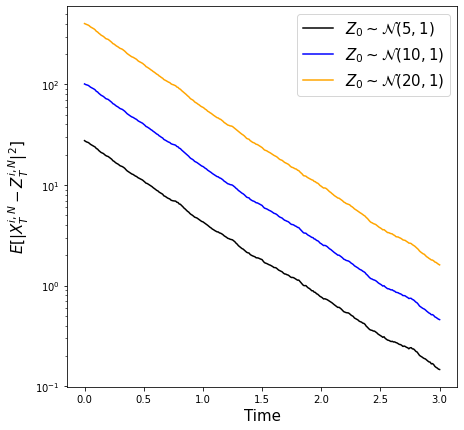

In [ ]:




import matplotlib.pyplot as plt
from matplotlib import pyplot
time=[0.01 *i for i in range(301)]

plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time', fontsize=15)
plt.ylabel(r'$E[|X^{i,N}_T-Z^{i,N}_T|^2]$', fontsize=15)

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
#plt.xscale("log")

##

#time=np.array(timestep)
# mse_ss1[3].pop(0)
# mse_ss2[3].pop(0)
# mse_ss3[3].pop(0)



a,=plt.plot(time, mse_ss11,color='black' )
b,=plt.plot(time, mse_ss22,color='blue' )
c,=plt.plot(time, mse_ss33,color='orange' )
plt.legend([a,b,c],[r'$Z_0\sim \mathcal{N}(5,1)$',r'$Z_0\sim \mathcal{N}(10,1)$',r'$Z_0\sim \mathcal{N}(20,1)$'], fontsize=15) 
plt.savefig('211130stability1-1', dpi=100)

<font size="20"> 
Simulation of stabilty 2, torch
    

In [60]:
# Compare of different scheme. test part.

# hmin=1e-2, N=1000, taming,ssm, without adaptive.

T=3
M=60
h=1e-2*5
n_of_scheme=8
n=1000
N=n
round_scheme=10
bm_time_trigger_for_k=0
# h_of_scheme=[1e-5,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
# n_of_scheme=len(h_of_scheme)
# time_bound_of_scehme=[1e-5,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
h_of_scheme=[1e-4,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
n_of_scheme=len(h_of_scheme)
time_bound_of_scehme=[1e-4,0.001,0.002,0.005,0.01,0.02,0.05,0.1]


time_moder_of_scehme=[]
for i in range(n_of_scheme):
    time_moder_of_scehme.append(int(M*time_bound_of_scehme[i]))


# timestep=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
# moder=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]
# for i in range(len(moder)):
#     moder[i]=int(moder[i]*(1e5))
timestep=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
moder=[0.001,0.002,0.005,0.01,0.02,0.05,0.1]
for i in range(len(moder)):
    moder[i]=int(moder[i]*(1e4))

nmoder=len(moder)



bm=torch.zeros(N, dtype=torch.float64)
#bm_for_other_method=[0 for i in range(n)]

bm_time_now=0
bm_time_trigger=[ 10000 for k in range(n_of_scheme) ]


particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact2=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact3=torch.zeros(2,N, dtype=torch.float64)
particle_split_step_exact4=torch.zeros(2,N, dtype=torch.float64)


#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(2,1)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    #xxx000=np.random.binomial(1,0.5)*101-1
    particle_split_step_exact1[1][i]=xxx000

    particle_split_step_exact2[1][i]=xxx000

    particle_split_step_exact3[1][i]=xxx000
    

    
gamma=0
theta=0        

xxx=0
M=int(1/h)
info_time=[]
ttii=[100,300,1000]
ttii=[600,700,800]

M=300

mse_ss1=[0 for i in range(M+1)]
mse_ss2=[0 for i in range(M+1)]
mse_ss3=[0 for i in range(M+1)] 


mse_ss1[0]=calculation_ex2(particle_split_step_exact1  )
mse_ss2[0]=calculation_ex2(particle_split_step_exact2  )
mse_ss3[0]=calculation_ex2(particle_split_step_exact3  )

h,M=0.02,50

for ii in range(1,M+1):
#for ii in range(1,60+1):

    if ii%50==0: print(ii)
    
    torch_make_brownian_motion(bm,h)
    torch_ssm_method(particle_split_step_exact1,bm,h,T,theta,gamma)
    torch_ssm_method(particle_split_step_exact2,bm,h,T,theta-12,gamma)
    torch_ssm_method(particle_split_step_exact3,bm,h,T,theta+12,gamma)
#     torch_ssm_method(particle_split_step_exact4,bm,h,T,gamma)

    mse_ss1[ii]=calculation_ex2(particle_split_step_exact1  )
    mse_ss2[ii]=calculation_ex2(particle_split_step_exact2  )
    mse_ss3[ii]=calculation_ex2(particle_split_step_exact3  )


50


In [9]:
h

0.05

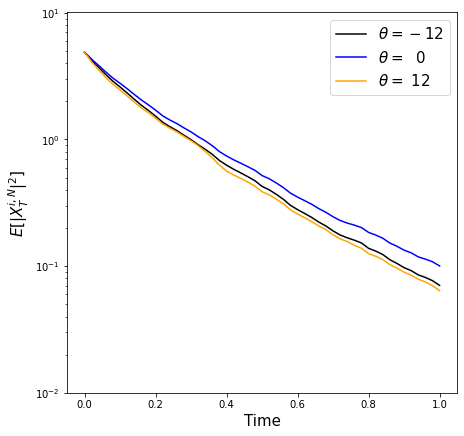

In [63]:
mse_ss11=[]
mse_ss22=[]
mse_ss33=[]

M=50
h=0.02

for i in range(M+1):
    mse_ss11.append(mse_ss1[i].tolist())
    mse_ss22.append(mse_ss2[i].tolist())
    mse_ss33.append(mse_ss3[i].tolist())



import matplotlib.pyplot as plt
from matplotlib import pyplot
time=[h *i for i in range(M+1)]

plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time', fontsize=15)
plt.ylabel(r'$E[|X^{i,N}_T|^2]$', fontsize=15)

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
plt.ylim(0.01,10.1)

plt.yscale('log')#plt.xscale('log') 
#plt.xscale("log")

##

#time=np.array(timestep)
# mse_ss1[3].pop(0)
# mse_ss2[3].pop(0)
# mse_ss3[3].pop(0)



a,=plt.plot(time, mse_ss11,color='black' )
b,=plt.plot(time, mse_ss22,color='blue' )
c,=plt.plot(time, mse_ss33,color='orange' )
plt.legend([a,b,c],[r'$\theta=-12$',r'$\theta=~~0$',r'$\theta=~12$'], fontsize=15) 
plt.savefig('211130stability1-2', dpi=100)

In [ ]:
mse_ss33

<font size="20"> 
Simulation of stabilty 3, torch
    

In [70]:
N=1000
T=1
n=1000
h=0.02
M=50

bm=torch.zeros(N, dtype=torch.float64)

particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
iniini=[]


#Inital distribution.
for i in range(n):
    xxx000=np.random.normal(2,1)
    #xxx000=1
    #xxx000=np.random.normal(2,100)
    #xxx000=np.random.binomial(1,0.5)*101-1
    iniini.append(xxx000)




exx1=[]
exx2=[]

for j in range(-24,25):    
  for k in range(-12,13): #-30 31
  # for k in range(-20,21): #-30 31
      theta=k
      gamma=j
      particle_split_step_exact1=torch.zeros(2,N, dtype=torch.float64)
      bm=torch.zeros(N, dtype=torch.float64)
      
      for i in range(n):
          particle_split_step_exact1[1][i]=iniini[i]
      
      
      if k%6==0: print(j,' ',k)
      for i in range(1,M+1):
          #print(i)

          make_brownian_motion(bm,h)  #make B.M.
          
          torch_ssm_method(particle_split_step_exact1,bm,h,T,theta,gamma)
          #split_step_method(particle_split_step_method2,bm,0.05,theta2,c,a,d,cc)
      
      exx2.append(calculation_ex2(particle_split_step_exact1))
      #exx3.append(calcuex2(particle_split_step_method2))

-24   -12
-24   -6
-24   0
-24   6
-24   12
-23   -12
-23   -6
-23   0
-23   6
-23   12
-22   -12
-22   -6
-22   0
-22   6
-22   12
-21   -12
-21   -6
-21   0
-21   6
-21   12
-20   -12
-20   -6
-20   0
-20   6
-20   12
-19   -12
-19   -6
-19   0
-19   6
-19   12
-18   -12
-18   -6
-18   0
-18   6
-18   12
-17   -12
-17   -6
-17   0
-17   6
-17   12
-16   -12
-16   -6
-16   0
-16   6
-16   12
-15   -12
-15   -6
-15   0
-15   6
-15   12
-14   -12
-14   -6
-14   0
-14   6
-14   12
-13   -12
-13   -6
-13   0
-13   6
-13   12
-12   -12
-12   -6
-12   0
-12   6
-12   12
-11   -12
-11   -6
-11   0
-11   6
-11   12
-10   -12
-10   -6
-10   0
-10   6
-10   12
-9   -12
-9   -6
-9   0
-9   6
-9   12
-8   -12
-8   -6
-8   0
-8   6
-8   12
-7   -12
-7   -6
-7   0
-7   6
-7   12
-6   -12
-6   -6
-6   0
-6   6
-6   12
-5   -12
-5   -6
-5   0
-5   6
-5   12
-4   -12
-4   -6
-4   0
-4   6
-4   12
-3   -12
-3   -6
-3   0
-3   6
-3   12
-2   -12
-2   -6
-2   0
-2   6
-2   12
-1   -12
-1   -6
-1   0
-1  

In [73]:
# xxx=np.array(exx2)

In [75]:
np.savetxt('test.out', xxx, delimiter=',') 

In [74]:
exx2=[0.03425761, 0.03644921, 0.03671191, 0.02892821, 0.02387821,
       0.03102642, 0.03450351, 0.03125359, 0.02950723, 0.03161321,
       0.02517071, 0.0276292 , 0.03365862, 0.03248637, 0.02037894,
       0.02465689, 0.01875421, 0.01949988, 0.01569242, 0.01699547,
       0.01418245, 0.01559103, 0.00868959, 0.01296584, 0.01506389]

In [77]:
np.savetxt('test1.txt',xxx)

In [76]:
xxx

array([0.38547133, 0.36439273, 0.37539064, ..., 0.01966917, 0.12775974,
       0.2082399 ])

In [81]:
xxx=[]
yyy=[]
# zzz=[]
for j in range(-24,25):    
  for k in range(-12,13):
    xxx.append(j)
    yyy.append(k)

In [79]:
zzz=[]
for i in range(len(xxx)):
  zzz.append(xxx[i] )

In [ ]:
zzz

In [82]:
xxx=np.array(xxx)
yyy=np.array(yyy)
zzz=np.array(zzz)

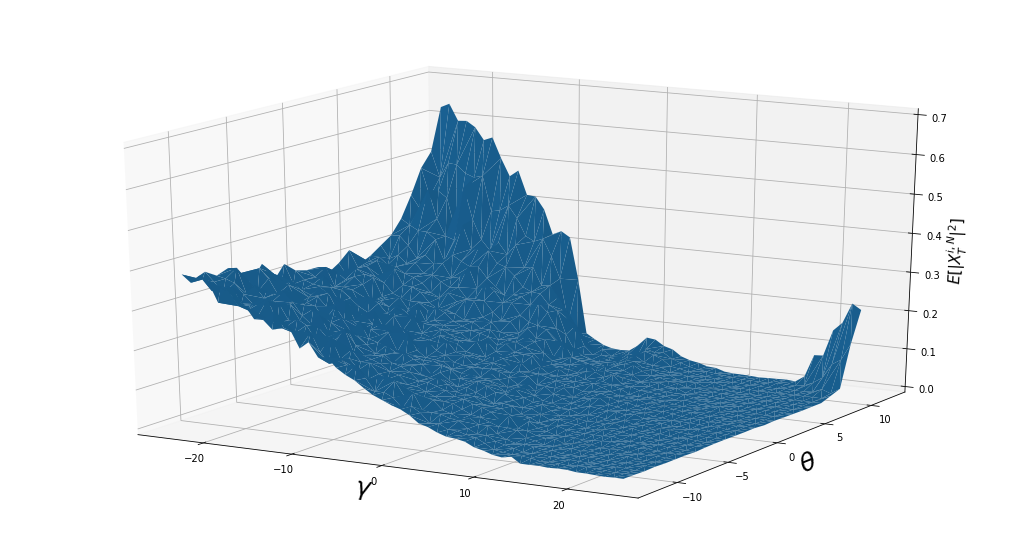

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(xxx, yyy, zzz)#, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(0, 0.7)
# ax.set_title(r'$E[|X_T^{i,N} |^2] $', fontsize=15)
ax.set_xlabel(r'$\gamma$', fontsize=25)
ax.set_ylabel(r'$\theta$', fontsize=25)
ax.set_zlabel(r'$E[|X_T^{i,N} |^2] $', fontsize=15)
ax.view_init(elev=20., azim=-60)
plt.savefig('211201stability1-4', dpi=300)

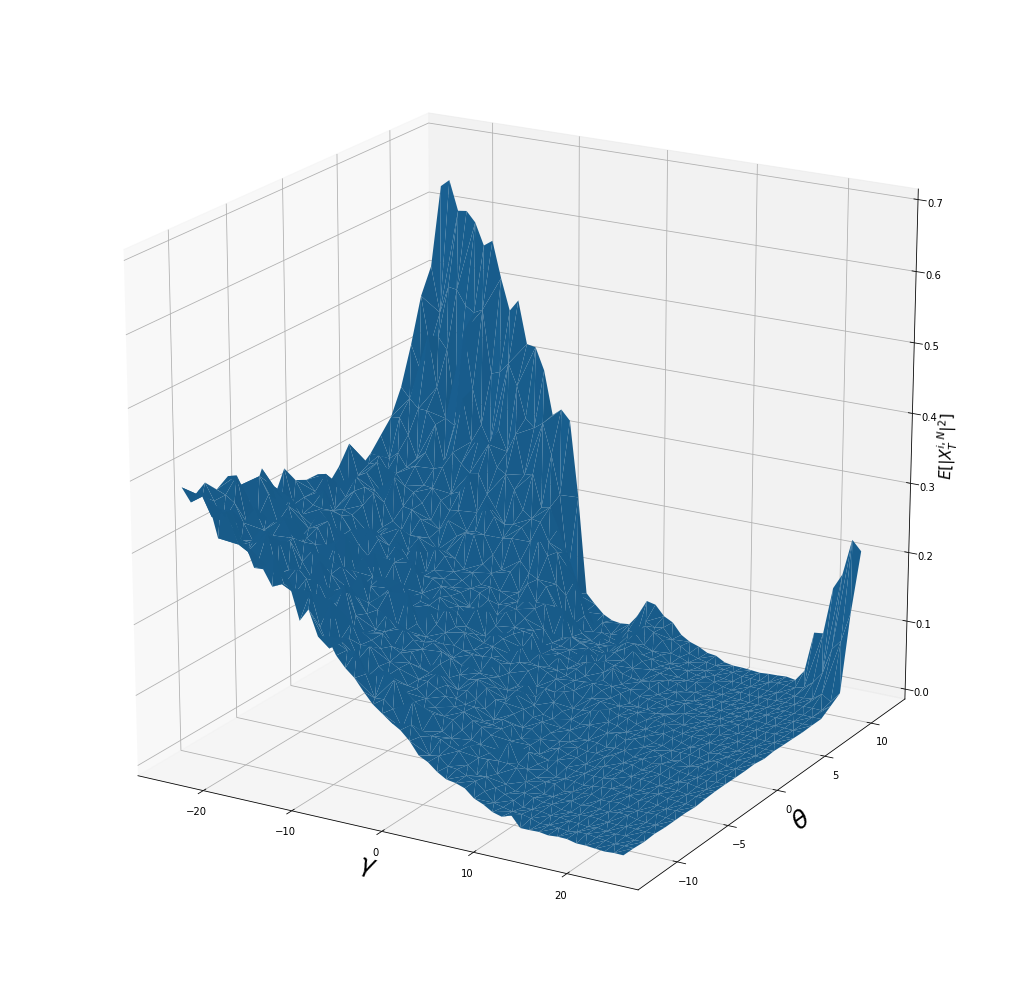

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=(40, 18))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(xxx, yyy, zzz)#, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(0, 0.7)
# ax.set_title(r'$E[|X_T^{i,N} |^2] $', fontsize=15)
ax.set_xlabel(r'$\gamma$', fontsize=25)
ax.set_ylabel(r'$\theta$', fontsize=25)
ax.set_zlabel(r'$E[|X_T^{i,N} |^2] $', fontsize=15)
ax.view_init(elev=20., azim=-60)
plt.savefig('211201stability1-5', dpi=300)

In [ ]:
xxx

In [ ]:
zzz

In [42]:
xxx=[]
yyy=[]
zzz=[]
ccc=[]
h=0.02
for j in range(-24,25):    #gamma
  for k in range(-12,13):  #theta
    gamma2=4*max(0,k)+2*(-2+j)+1
    A=-2*(j+k)+2*k+1
    B=(j+k)**2+k**2
    if gamma2*h<1 and 2*(-2+j+k)*h<1 and (1+h* ((gamma2+A)+B*h) / (1-gamma2*h))<=8:
      xxx.append(j)
      yyy.append(k)
      zzz.append( 1+h* ((gamma2+A)+B*h) / (1-gamma2*h) )
      ccc.append(1)
    # else:
    #   print(j,' ',k)

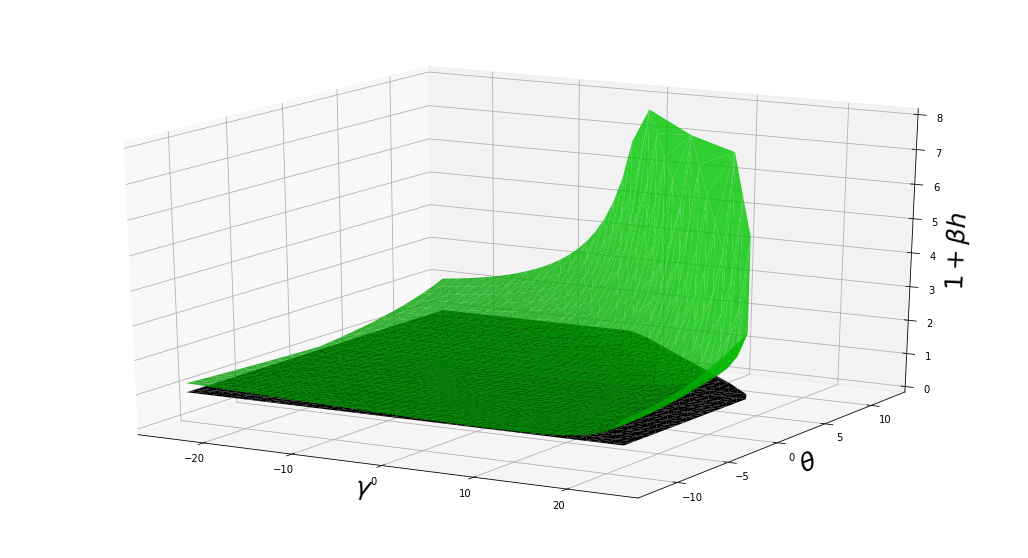

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=(40, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(xxx, yyy, zzz,color=(0,0.8,0,0.8), antialiased=True)#, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(xxx, yyy, ccc,color=(0,0,0), antialiased=True)#, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(0, 8)
# ax.set_title(r'$1+\beat h $', fontsize=15)
ax.set_xlabel(r'$\gamma$', fontsize=25)
ax.set_ylabel(r'$\theta$', fontsize=25)
ax.set_zlabel(r'$1+\beta h $', fontsize=25)
ax.view_init(elev=20., azim=-60)
plt.savefig('211201stability1-6', dpi=300)

In [ ]:
zzz

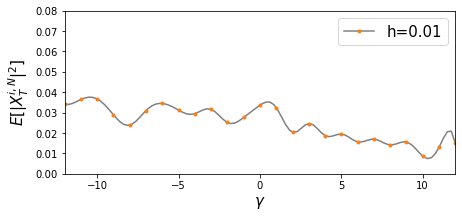

In [ ]:
from matplotlib import pyplot
from scipy.interpolate import make_interp_spline, BSpline
hhh=[k for k in range(-12,13)]
# hhh[0]==-31*0.4-0.1
#hhh=[ k*1.5 for  k in range(-10,11) ]
# for i in range(len(hhh)):
#     theta=hhh[i]
#     ggg.append(0)
#     fff.append( (theta**2+2*theta-2)/(4*theta**3-6*theta**2+4*theta+0.01)  )
plt.rcParams["figure.figsize"] = (7,3)

hhh=np.array(hhh)
exx2=np.array(exx2)
hhhnew = np.linspace(hhh.min(), hhh.max(), 100) 
spl = make_interp_spline(hhh, exx2, k=5)
exx2_smooth = spl(hhhnew)


plt.xlabel(r'$\gamma$', fontsize=15)  
plt.ylabel(r'$E[|X_T^{i,N} |^2] $', fontsize=15) 

#plt.title('Different method compare to the exact solution')

plt.xlim(-12,12)
plt.ylim(0,0.08)

#plt.yscale('log')#plt.xscale('log') 
#plt.xscale("log")

##

#time=np.array(timestep)

#a,=plt.plot(hhh, exx1,color='black' )
b,=plt.plot(hhhnew, exx2_smooth,color='grey' )
f,=plt.plot(hhh, exx2,'.',color='C1')
plt.legend([(b,f)],[r'h=0.01'], fontsize=15) 
plt.savefig('211130stability1-3', dpi=300)

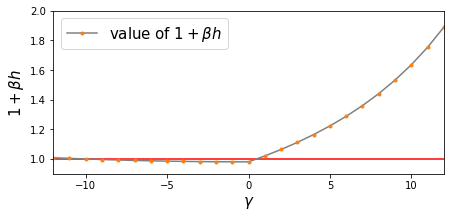

In [ ]:
##1.5 .h=0.1

from matplotlib import pyplot
from scipy.interpolate import make_interp_spline, BSpline

hhh=[k for k in range(-20,21)]
beta=[]
for i in range( len(hhh) ):
#     if hhh[i]<-4.5: beta.append(0)
#     else:
        beta.append( 1+0.01*( ( 4*max(0,hhh[i])-3+1) +0.01*(2*hhh[i]**2)  )/(1-0.01*(4*max(0,hhh[i])-3) ))

hhh222=[k for k in range(-20,21)]
beta222=[]
for i in range( len(hhh222) ):
    beta222.append(1)
     
# hhh[0]==-31*0.4-0.1
#hhh=[ k*1.5 for  k in range(-10,11) ]
# for i in range(len(hhh)):
#     theta=hhh[i]
#     ggg.append(0)
#     fff.append( (theta**2+2*theta-2)/(4*theta**3-6*theta**2+4*theta+0.01)  )
plt.rcParams["figure.figsize"] = (7,3)

# hhh=np.array(hhh)
# exx3=np.array(exx3)
# hhhnew = np.linspace(hhh.min(), hhh.max(), 200) 
# spl = make_interp_spline(hhh, exx3, k=5)
# exx2_smooth = spl(hhhnew)


plt.xlabel(r'$\gamma$', fontsize=15)  
plt.ylabel(r'$1+\beta h $', fontsize=15) 

#plt.title('Different method compare to the exact solution')

plt.xlim(-12,12)
plt.ylim(0.9,2)

#plt.yscale('log')#plt.xscale('log') 
#plt.xscale("log")

##

#time=np.array(timestep)

#a,=plt.plot(hhh, exx1,color='black' )
bb,=plt.plot(hhh222, beta222,color='red' )
b,=plt.plot(hhh, beta,color='grey' )
f,=plt.plot(hhh, beta,'.',color='C1')
plt.legend([(b,f)],[r'value of $1+\beta h $'], fontsize=15,loc="upper left") 
plt.savefig('211130stability1-4', dpi=300)

In [ ]:
beta[21]

1.0204040404040404

In [ ]:
hhh

array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12])

<font size="20"> Not the case below

In [ ]:
def ada_make_brownian_motion(h):  # Update BM, push it into h future.
    hh=np.sqrt(h)
    rrr=hh*np.random.normal(0,1) 
    return(rrr)

def cal_function_v(xi,mea_x,h,ii):
    C=1
    n=len(mea_x)
    inc1=0
    for j in range(n):
            inc1+=fff(xi,mea_x[j][1])
            
    
    inc1=(inc1-fff(xi,mea_x[ii][1]))/n
    hi=h*max(min(C*(xi**2)/(inc1*inc1),1),0.01)     # only the h(x) part.
    
    return(inc1,hi)


def store_measure(x,y):
    n=len(x)
    for i in range(0,len(x)):
        y[i]=x[i][1]
    return(0)

def find_the_time(tnow,trigg,rs):
    aa=10
    maker=0
    for i in range(len(trigg)):
        bb=round( trigg[i]-tnow,rs)
        if aa>bb:
            maker=i
            aa=bb
    return(aa,maker)

def adaptive_method_v2(x,bm,h):     ## x[i][0] is BM information, x[i][1] is particle's information  x[i][2] is the v function
    n=len(bm)
    sig=np.sqrt(2)
        
    for i in range(0,n):
        dWt=bm[i]-x[i][0]
        x[i][0]=bm[i]                  # Update BM 
        x[i][1]+=x[i][2]*h + sig*dWt
    return(0)

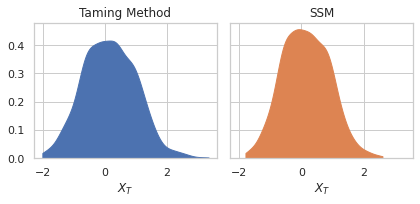

In [ ]:
newvalue=[]
newnames=[]

selected_examples(info_time[2],newvalue,newnames,-5,5)
data = {'Method': newnames, r'$X_T$': newvalue }
df2 = pd.DataFrame(data)
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df2, col="Method", hue="Method", col_wrap=2, margin_titles=True, despine=False)

# draw density plots
g = g.map(sns.kdeplot,r'$X_T$', cut=0, fill=True, common_norm=False,alpha=1,  legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

0
1


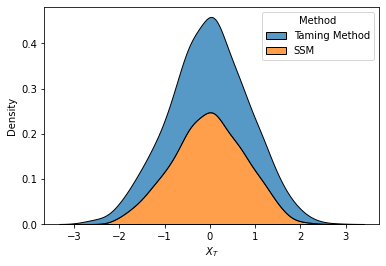

In [ ]:
method_value=[particle_taming_exact1,particle_split_step_exact1]
method_names=[ 'Taming Method','SSM' ]
infor_list=save_information(method_value,method_names)
newvalue=[]
newnames=[]

selected_examples(infor_list,newvalue,newnames,-5,5)
data = {'Method': newnames, r'$X_T$': newvalue }
df2 = pd.DataFrame(data)
plot =sns.kdeplot(data=df2, x=r'$X_T$', hue="Method",multiple="stack")
plot.xlim=(-5,5)

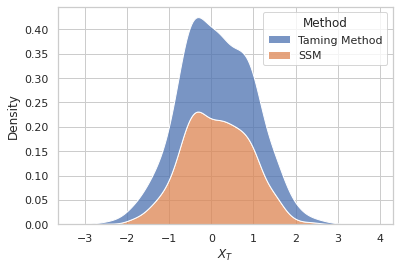

In [ ]:
newvalue=[]
newnames=[]

selected_examples(info_time[0],newvalue,newnames,-5,5)
data = {'Method': newnames, r'$X_T$': newvalue }
df2 = pd.DataFrame(data)
plot =sns.kdeplot(data=df2, x=r'$X_T$', hue="Method",multiple="stack")
plot.xlim=(-5,5)

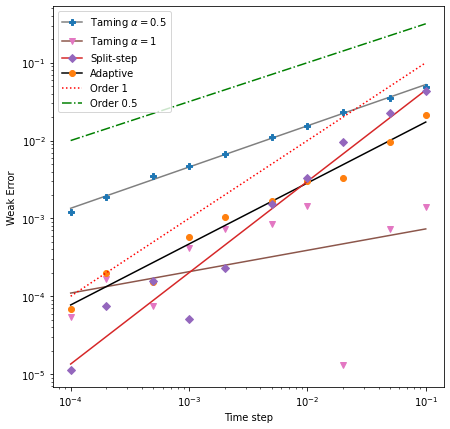

In [ ]:
# make graphs.



# make graphs.
from matplotlib import pyplot
timestep=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]

plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time step')  
plt.ylabel('Weak Error') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)
m1, b1 = np.polyfit(np.log(timestep),np.log(weak_error_taming1),1)
a,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b,=plt.plot(timestep,weak_error_taming1,'P',color='C0')

m1, b1 = np.polyfit(np.log(timestep),np.log(weak_error_taming2),1)
a1,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='C5' )
b1,=plt.plot(timestep,weak_error_taming2,'v',color='C6')

m3, b3 = np.polyfit(np.log(timestep),np.log(weak_error_adaptive),1)
e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
f,=plt.plot(timestep,weak_error_adaptive,'o',color='C1')


m2, b2 = np.polyfit(np.log(timestep),np.log(weak_error_split_step2),1)
j,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='C3' )
k,=plt.plot(timestep,weak_error_split_step2,'D',color='C4')



#g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
z,=plt.plot(timestep, (timestep**1),':',label='Order 1',color='red')
z2,=plt.plot(timestep, (timestep**0.5),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##
plt.legend([(a,b),(a1,b1),(j,k),(e,f),z,z2],[r'Taming $\alpha=0.5$',r'Taming $\alpha=1$',r'Split-step','Adaptive','Order 1','Order 0.5']) 
plt.savefig('Simulation20210428weakerror_poly.png', dpi=100)

In [ ]:
time1_adaptive=[]
time1_split_step1=[]
time1_split_step2=[]
time1_splitting=[]
time1_taming1=[]
time1_taming2=[]
for i in range(10):
    time1_adaptive.append(time_adaptive[i+1])
    time1_split_step1.append(time_split_step1[i+1])
    time1_split_step2.append(time_split_step2[i+1])
    time1_taming1.append(time_taming1[i+1])
    time1_taming2.append(time_taming2[i+1])

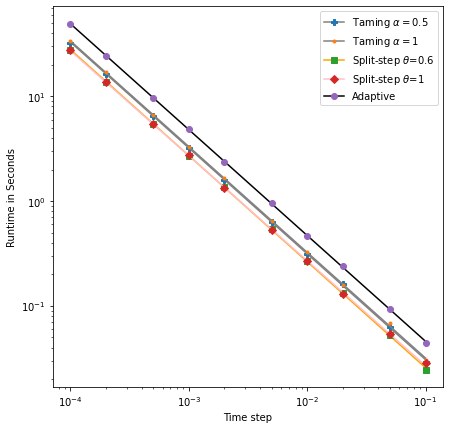

In [ ]:
# make graphs.
from matplotlib import pyplot
timestep=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1]

plt.rcParams["figure.figsize"] = (7,7)


plt.xlabel('Time step')  
plt.ylabel('Runtime in Seconds') 

#plt.title('Different method compare to the exact solution')

#plt.xlim(0,0.1)
#plt.ylim(0.000001,1)

plt.yscale('log')#plt.xscale('log') 
plt.xscale("log")

##

timestep=np.array(timestep)
m1, b1 = np.polyfit(np.log(timestep),np.log(time1_taming1),1)
a,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b,=plt.plot(timestep,time1_taming1,'P')
m1, b1 = np.polyfit(np.log(timestep),np.log(time1_taming2),1)
a1,=plt.plot(timestep, (timestep**m1)*np.exp(b1),color='grey' )
b1,=plt.plot(timestep,time1_taming2,'.')

m2, b2 = np.polyfit(np.log(timestep),np.log(time1_split_step1),1)
c,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='orange'  )
d,=plt.plot(timestep,time1_split_step1,'s')

m2, b2 = np.polyfit(np.log(timestep),np.log(time1_split_step2),1)
j,=plt.plot(timestep, (timestep**m2)*np.exp(b2),color='pink' )
k,=plt.plot(timestep,time1_split_step2,'D')

m3, b3 = np.polyfit(np.log(timestep),np.log(time1_adaptive),1)
e,=plt.plot(timestep, (timestep**m3)*np.exp(b3),color='black' )
f,=plt.plot(timestep,time1_adaptive,'o')



#g,=plt.plot(timestep, (timestep**2),'g-.',label='Order 1',color='black')
#z,=plt.plot(timestep, (timestep**1),'g-.',label='Order 1',color='red')
#z2,=plt.plot(timestep, (timestep**0.5),'g-.',label='Order 1',color='green')
#q,=plt.plot(timestep, (timestep**1.5),'g-.',label='Order 1.5',color='green')
##
plt.legend([(a,b),(a1,b1),(c,d),(j,k),(e,f)],[r'Taming $\alpha=0.5$',r'Taming $\alpha=1$' ,r'Split-step $\theta$=0.6',r'Split-step $\theta$=1','Adaptive']) 
plt.savefig('Simulation20210427timeconsume_poly.png', dpi=100)

In [ ]:
#[time_adaptive,time_split_step1,time_split_step2,time_splitting,time_taming]

In [ ]:
strong_error_adaptive

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]